In [2]:
dat = read.csv('../data/AVM_day0_spectra.csv', sep='\t')

In [115]:
ppm = rev(as.numeric(dat[['X']]))
spectra = t(as.matrix(dat[c(2:17)]))
spectra = spectra[, ncol(spectra): 1]

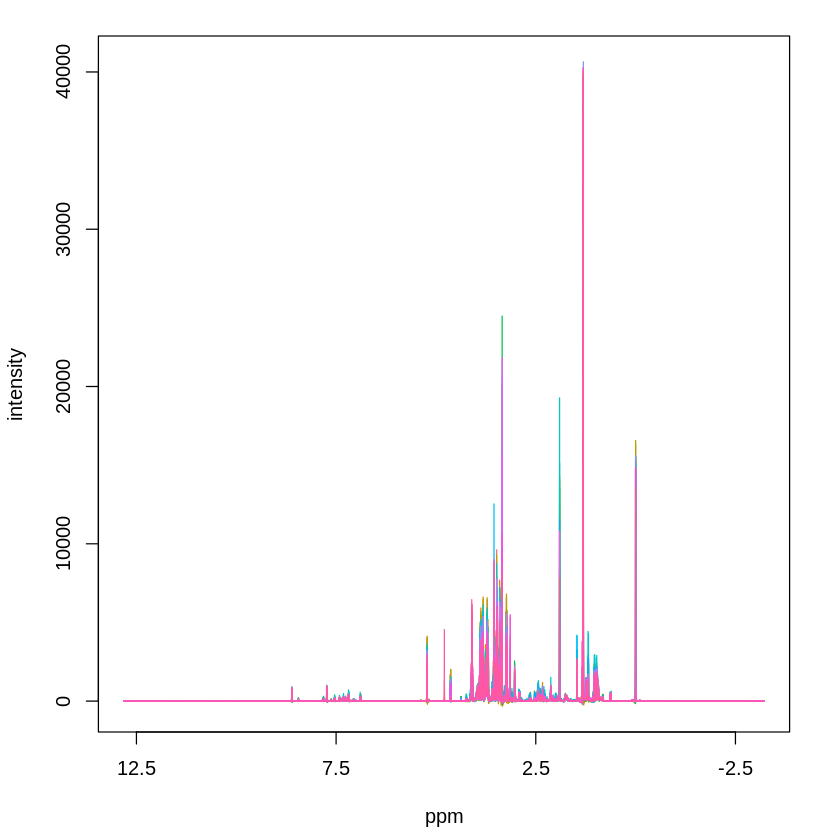

In [116]:
library(speaq)
speaq::drawSpecPPM(Y.spec = spectra, 
                   X.ppm = ppm)
#                    title = 'Wine data spectra', 
#                    groupFactor = wine.color, 
#                    legend.extra.x = 1, 
#                    legend.extra.y = 1.1)

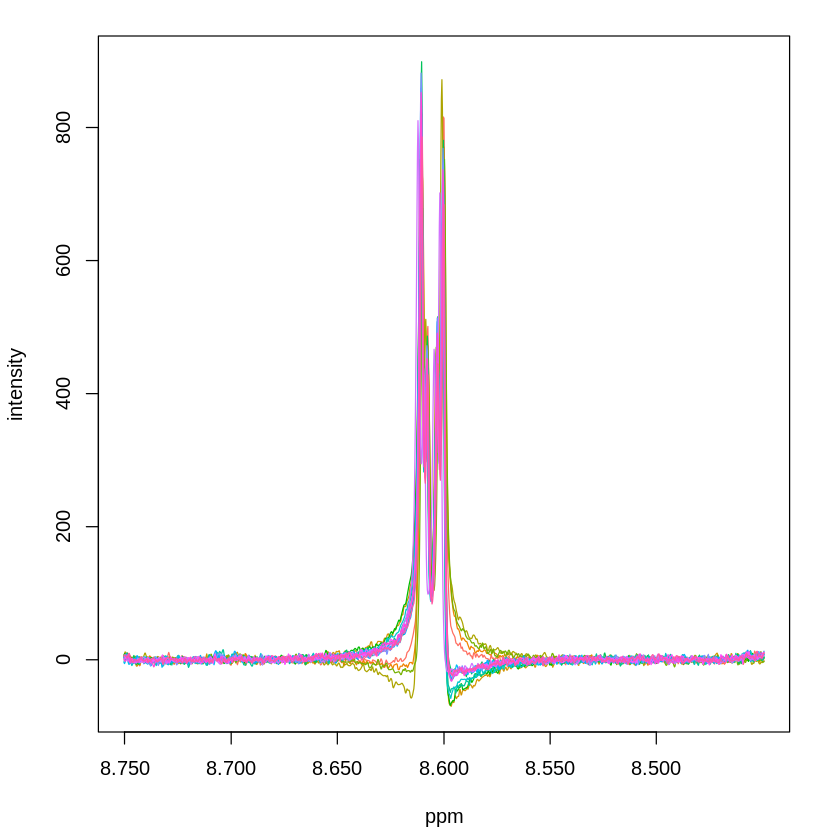

In [118]:
# small excerpt by defining the region of interest
speaq::drawSpecPPM(Y.spec = spectra, 
                   X.ppm = ppm, 
#                    groupFactor = as.factor(wine.color), 
#                    title = 'Raw wine data excerpt', 
                   legend.extra.x = 1.1, 
                   legend.extra.y = 1.0,
                   ROI.ppm = 8.6, 
                   ROI = NULL, 
                   roiWidth.ppm = 0.15,
                   legendpos = "topright" )

In [119]:
peaks <- speaq::getWaveletPeaks(Y.spec=spectra, 
                                     X.ppm=ppm, 
                                     baselineThresh = 10,
                                     SNR.Th = -1, 
                                     nCPU = 8, 
                                     include_nearbyPeaks = TRUE)

[1] "detecting peaks"
  |======================================================================| 100%
[1] "fixing duplicate detections"
  |======================================================================| 100%


In [120]:
grouped <- speaq::PeakGrouper(Y.peaks = peaks,
                                   min.samp.grp = 5,
                                   grouping.window.width = 200)

[1] "regrouping peaks"
  |======================================================================| 100%
[1] "verifying regroupment"
  |======================================================================| 100%


Warning message:
“Removed 2 rows containing missing values (geom_point).”

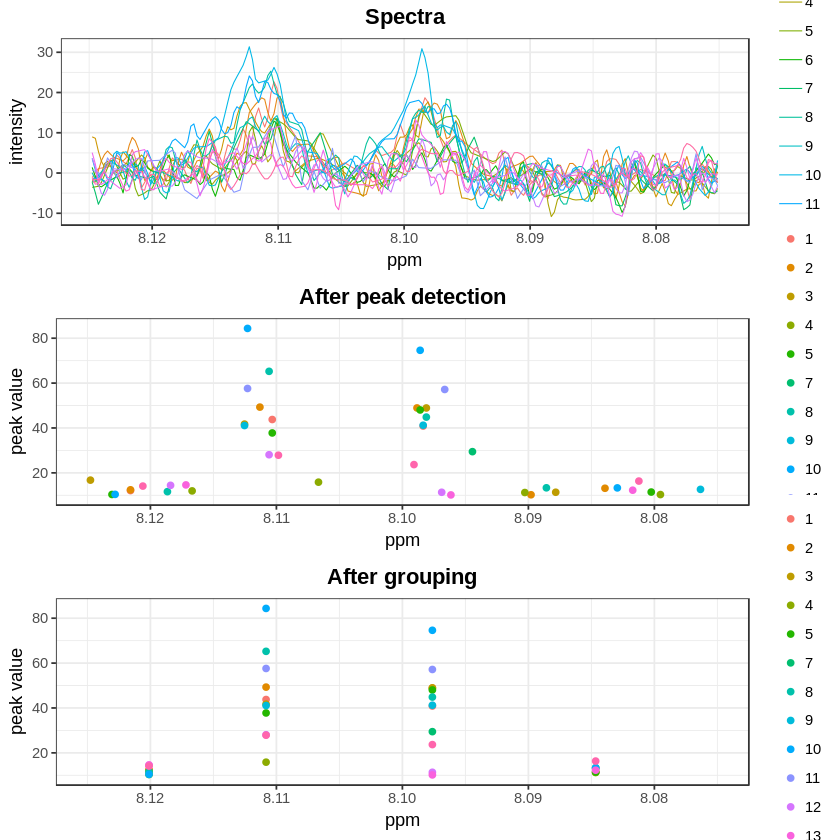

In [137]:
# adding labels to the dat a for plotting and the group ppm values
library(ggplot2)
ROI.ppm <- 8.1
roiWidth.ppm <- 0.025

speaq::ROIplot(Y.spec = spectra, 
               X.ppm = ppm, 
               ungrouped.peaks = peaks,
               grouped.peaks = grouped, 
               ROI.ppm = ROI.ppm,
               roiWidth.ppm = roiWidth.ppm)
#                groupLabels = as.factor(wine.color))

DataMatrix is not a matrix, attempting conversion with the assumption of only 1 variable (1 column)


[1] "Computing dissimilarity matrix"
[1] "Computing silhouette values"
  |====================================================================================================| 100%


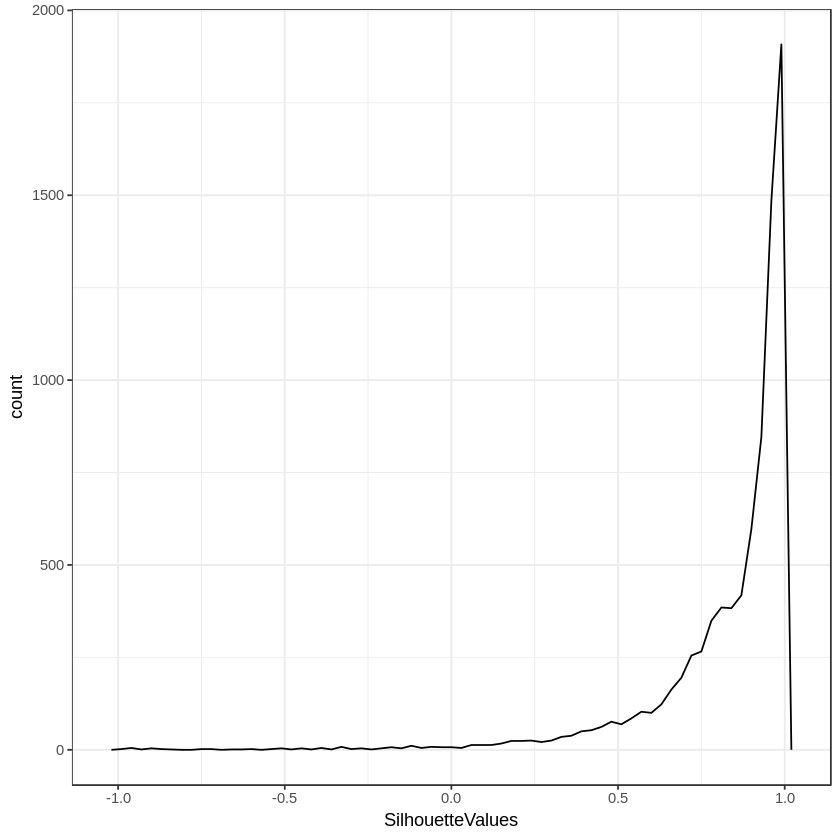

In [123]:
SilhouetteValues <- speaq::SilhouetR(DataMatrix = grouped$peakPPM, 
                                     GroupIndices = grouped$peakIndex)
Silh_plot <- ggplot(SilhouetteValues, aes(SilhouetteValues)) +
             geom_freqpoly(binwidth = 0.03) +
             theme_bw()
Silh_plot

In [124]:
groups <- unique(SilhouetteValues$GroupIndices)
Ngroups <- length(groups)
sil_means <- matrix(NA, ncol = 3, nrow = Ngroups)

for (k in 1:Ngroups) {
    sil_means[k, 1] = groups[k]
    sil_means[k, 2] = mean(SilhouetteValues$SilhouetteValues[SilhouetteValues$GroupIndices == 
        groups[k]])
    sil_means[k, 3] = mean(grouped$peakSNR[grouped$peakIndex == groups[k]])
}

sil_means <- sil_means[order(sil_means[, 2]), ]
colnames(sil_means) <- c("groupIndex", "avg_silhouette_val", "avg. SNR")

a = sil_means[rev(order(sil_means[, 'avg. SNR'])), ]
a[a[, 'avg_silhouette_val'] < 0.25, ]

groupIndex,avg_silhouette_val,avg. SNR
6730,-0.4457740,3.597636
16183,-0.1726593,3.580605
26214,0.1378754,3.507583
16702,0.1683461,3.394590
28905,-0.6492408,3.312325
25989,0.1596282,3.232207
27866,0.1818701,3.219337
28611,0.1795798,3.069970
60409,-0.8966851,2.918458
50354,0.1473563,2.860469


In [125]:
filled <- speaq::PeakFilling(Y.grouped = grouped, 
                                  Y.spec = spectra,  
                                  max.index.shift = 200,
                                  nCPU = 8)

[1] "There are 16 samples in the dataset."
  |======================================================================| 100%


In [126]:
features <- speaq::BuildFeatureMatrix(filled)

In [133]:
head(filled[filled$peakSNR > 10 & filled$peakValue > 30 & filled$peakPPM < 8.35, ], 50)

,peakIndex,peakPPM,peakValue,peakSNR,peakScale,Sample
444,18309,8.33652,44.09132,12.40039,16.0,1
448,18309,8.33432,44.97916,10.53945,16.0,6
449,18309,8.33359,44.22095,10.58124,9.5,7
450,18309,8.33212,53.32261,11.94140,16.0,8
451,18309,8.33530,49.79255,12.94223,11.5,9
454,18309,8.33677,68.18756,15.97117,9.0,13
600,19223,8.11131,49.29976,12.64402,13.0,2
601,19223,8.11253,41.72178,11.03209,16.0,3
604,19223,8.11058,65.24025,15.01739,16.0,8
605,19223,8.11253,41.09193,10.19527,13.0,9


In [79]:
features.scaled <- speaq::SCANT(data.matrix = features, 
                                     type = c("pareto", "center"))  

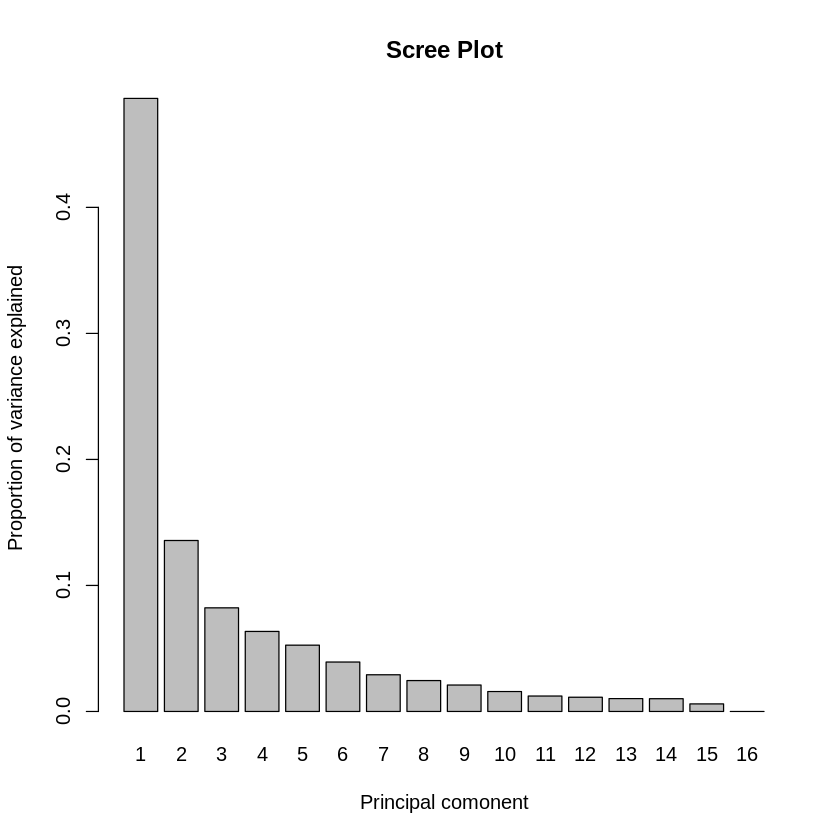

In [80]:
common.pca <- prcomp(features.scaled) 


loadings <- common.pca$rotation
scores <- common.pca$x
varExplained <- common.pca$sdev^2

barplot(varExplained/sum(varExplained), 
        main="Scree Plot",ylab="Proportion of variance explained", 
        xlab = "Principal comonent", 
        names.arg = as.character(seq(1,length(varExplained))))

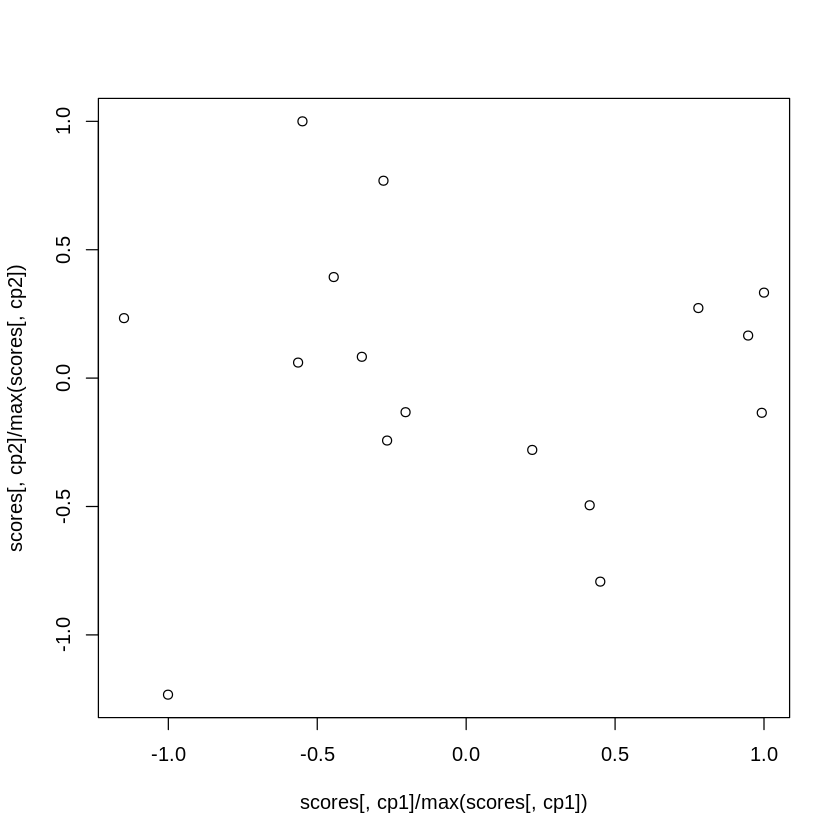

In [82]:
# plot.marks <- as.numeric(wine.color)
# plot.marks[plot.marks == 1] <- 8 
# plot.marks[plot.marks == 2] <- 15
# plot.marks[plot.marks == 3] <- 1

cp1 <- 1
cp2 <- 2 
plot(scores[,cp1]/max(scores[,cp1]), scores[,cp2]/max(scores[,cp2]))